In [3]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
hdata = pd.read_csv(r"C:\Users\Admin\Heart_Failure_Prediction\CSV\heart.csv")

In [5]:
hdata.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [6]:
hdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [7]:
hdata.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [8]:
hdata.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [9]:
col = list(hdata.columns)
categorical_variables = []
numerical_Variables = []
for i in col:
    if len(hdata[i].unique()) > 6:
        numerical_Variables.append(i)
    else:
        categorical_variables.append(i)
print(f"Categorical  :{categorical_variables},\nNumber of Categorical Variable: {len(categorical_variables)} ")
print(f"Numerical  :{numerical_Variables},\nNumber of Numerical Variable: {len(numerical_Variables)} ")



Categorical  :['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease'],
Number of Categorical Variable: 7 
Numerical  :['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak'],
Number of Numerical Variable: 5 


In [10]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cpy = hdata.copy(deep = True)

data_cpy['Sex'] = le.fit_transform(data_cpy['Sex'])
data_cpy['ChestPainType'] = le.fit_transform(data_cpy['ChestPainType'])
data_cpy['RestingECG'] = le.fit_transform(data_cpy['RestingECG'])
data_cpy['ExerciseAngina'] = le.fit_transform(data_cpy['ExerciseAngina'])
data_cpy['ST_Slope'] = le.fit_transform(data_cpy['ST_Slope'])

In [11]:
hdata['Sex'][1]

'F'

## EDA on Categorical Variable

In [12]:
pie_plot(cp,['ASY', 'NAP', 'ATA', 'TA'],'Percentage Values of CheastPainType vs Heart Disease',(0,0.1,0.1,0.1))

NameError: name 'pie_plot' is not defined

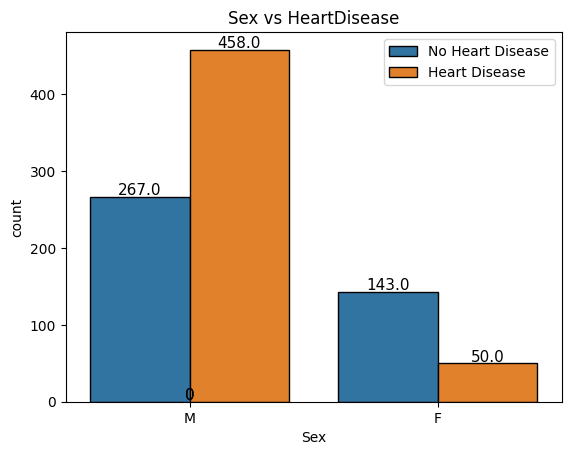

In [ ]:
ax = sns.countplot(x='Sex',data = hdata,hue = "HeartDisease",edgecolor = 'black')
for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = 'Sex' + ' vs HeartDisease'
plt.legend(['No Heart Disease','Heart Disease'])
plt.title(title);
    
    

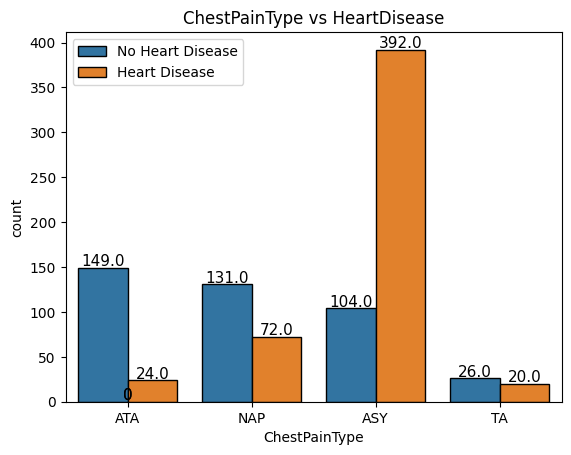

In [ ]:
ax = sns.countplot(x='ChestPainType',data = hdata,hue = "HeartDisease",edgecolor = 'black')
for rect in ax.patches:
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
title = 'ChestPainType' + ' vs HeartDisease'
plt.legend(['No Heart Disease','Heart Disease'])
plt.title(title);
    
    

In [ ]:
sex = hdata[hdata['HeartDisease'] == 1]['Sex'].value_counts()
sex = [sex[0] / sum(sex) * 100, sex[1] / sum(sex) * 100]

cp = hdata[hdata['HeartDisease'] == 1]['ChestPainType'].value_counts()
cp = [cp[0] / sum(cp) * 100,cp[1] / sum(cp) * 100,cp[2] / sum(cp) * 100,cp[3] / sum(cp) * 100]

fbs = hdata[hdata['HeartDisease'] == 1]['FastingBS'].value_counts()
fbs = [fbs[0] / sum(fbs) * 100,fbs[1] / sum(fbs) * 100]

restecg = hdata[hdata['HeartDisease'] == 1]['RestingECG'].value_counts()
restecg = [restecg[0] / sum(restecg) * 100,restecg[1] / sum(restecg) * 100,restecg[2] / sum(restecg) * 100]

exang = hdata[hdata['HeartDisease'] == 1]['ExerciseAngina'].value_counts()
exang = [exang[0] / sum(exang) * 100,exang[1] / sum(exang) * 100]

slope = hdata[hdata['HeartDisease'] == 1]['ST_Slope'].value_counts()
slope = [slope[0] / sum(slope) * 100,slope[1] / sum(slope) * 100,slope[2] / sum(slope) * 100]

In [ ]:
sex

[90.15748031496062, 9.84251968503937]

In [ ]:
def pie_plot(xdata, label,Title,Explode):
    fig, ax = plt.subplots()
    ax.pie(xdata,labels=label,explode = Explode, autopct='%1.1f%%',
        wedgeprops = {'edgecolor' : 'black','linewidth': 1,'antialiased' : True}, startangle=90)
    plt.title(Title)
    plt.show()

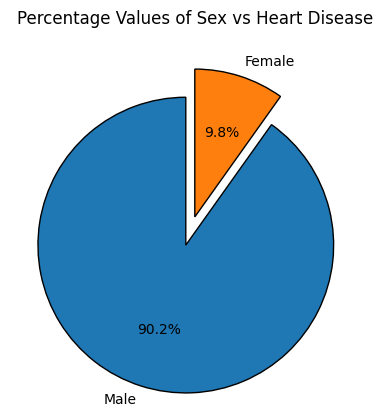

In [ ]:
pie_plot(sex,['Male','Female'],Title='Percentage Values of Sex vs Heart Disease',Explode = (0.2,0))


Out of all the heart disease patients, a staggering 90% patients are male.

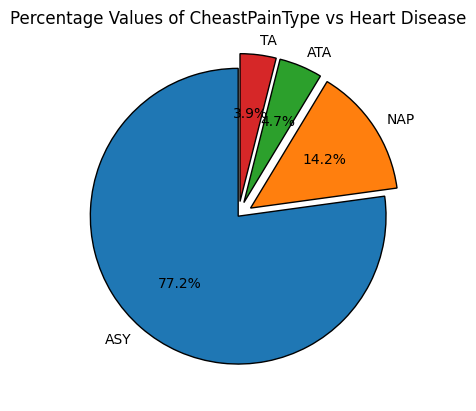

In [ ]:
pie_plot(cp,['ASY', 'NAP', 'ATA', 'TA'],'Percentage Values of CheastPainType vs Heart Disease',(0,0.1,0.1,0.1))

When it comes to the type of chest pain, ASY type holds the majority with 77% that lead to heart diseases.

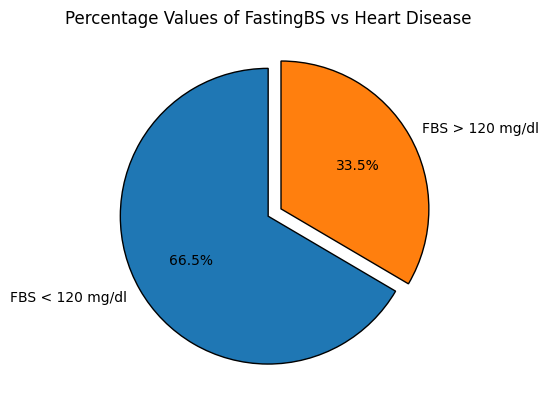

In [ ]:
pie_plot(fbs,['FBS < 120 mg/dl','FBS > 120 mg/dl'],'Percentage Values of FastingBS vs Heart Disease',(0,0.1))

Fasting Blood Sugar level < 120 mg/dl displays high chances of heart diseases.

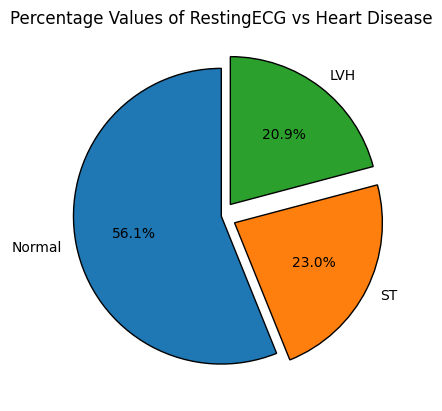

In [ ]:
pie_plot(restecg,['Normal','ST','LVH'],'Percentage Values of RestingECG vs Heart Disease',(0,0.1,0.1))

For RestingECG, Normal level accounts for 56% chances of heart diseases than LVH and ST levels.

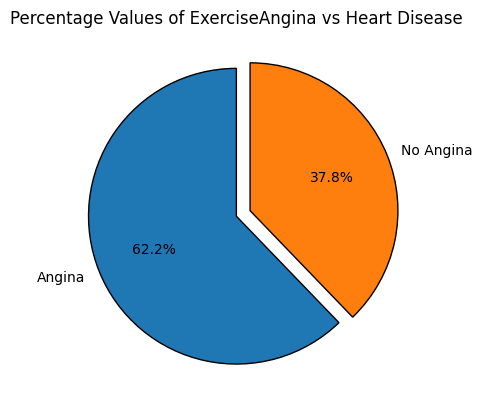

In [ ]:
pie_plot(exang,['Angina','No Angina'],'Percentage Values of ExerciseAngina vs Heart Disease',(0,0.1))


Detection of Exercise Induced Angina also points towards heart diseases.

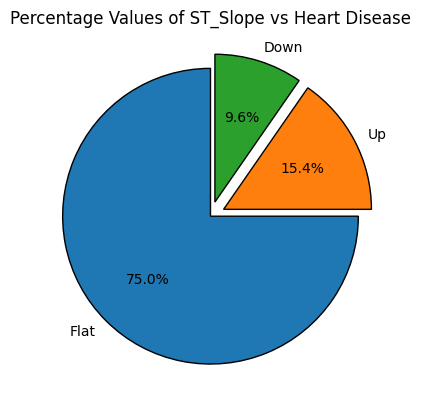

In [ ]:
pie_plot(slope,['Flat','Up','Down'],'Percentage Values of ST_Slope vs Heart Disease',(0,0.1,0.1))


When it comes to ST_Slope readings, Flat level holds a massive chunk with 75% that may assist in detecting underlying heart problems.

## EDA On numerical variable

In [ ]:
numerical_Variables

['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [ ]:
hdata['RestingBP_Group'] = [ int(i / 5) for i in hdata['RestingBP']]
hdata['Cholesterol_Group'] = [ int(i / 10) for i in hdata['Cholesterol']]
hdata['MaxHR_Group'] = [ int(i / 5) for i in hdata['MaxHR']]
hdata['Oldpeak_Group'] = [ int( (i*10) / 5) for i in hdata['Oldpeak']]

In [ ]:
def b_plot(data,X,Title,Figsize):
    fig, ax = plt.subplots(nrows = 1,ncols = 1,figsize = Figsize)
    plt.subplot(1,1,1)
    sns.countplot(data, x=X, hue="HeartDisease")
    plt.legend(['No Heart Disease', 'Heart Disease'])
    plt.title(Title);

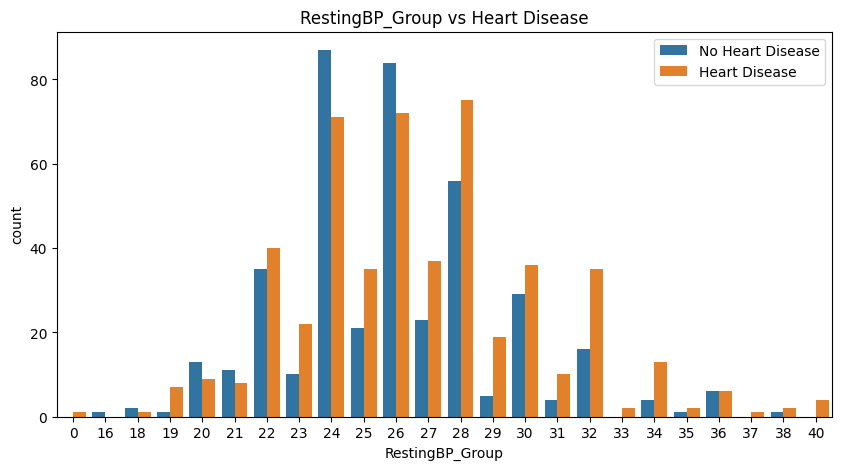

In [ ]:
b_plot(hdata,hdata['RestingBP_Group'],'RestingBP_Group vs Heart Disease',(10,5))

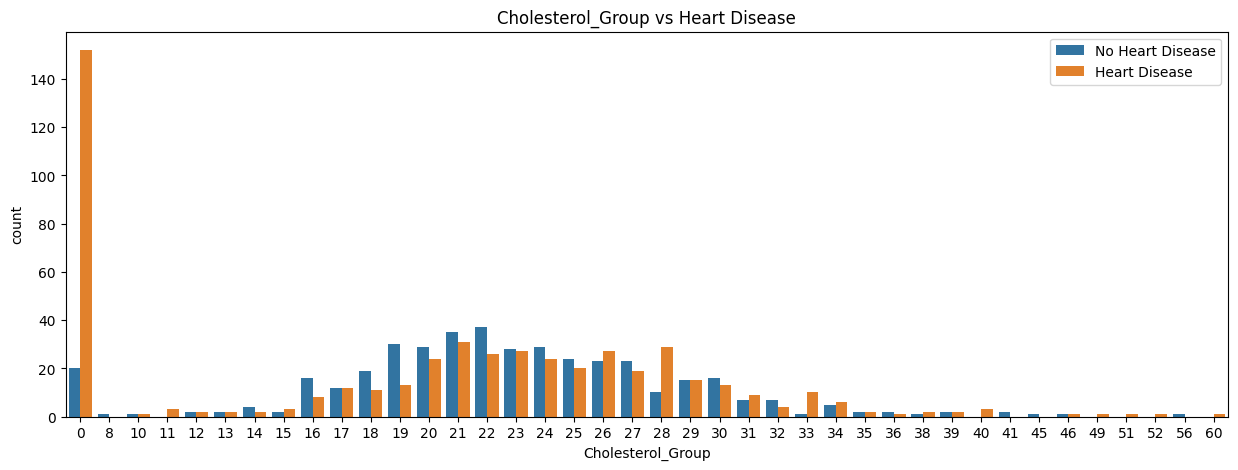

In [ ]:
b_plot(hdata,hdata['Cholesterol_Group'],'Cholesterol_Group vs Heart Disease',(15,5))

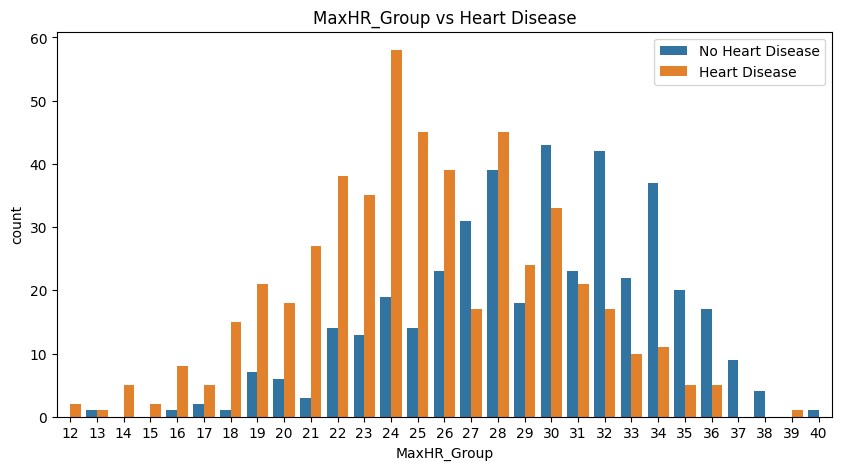

In [ ]:
b_plot(hdata,hdata['MaxHR_Group'],'MaxHR_Group vs Heart Disease',(10,5))

In [ ]:
b_plot(hdata,hdata['Oldpeak_Group'],'Oldpeak_Group vs Heart Disease',(10,5))

NameError: name 'b_plot' is not defined

In [15]:
data_cpy

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,3,110,264,0,1,132,0,1.2,1,1
914,68,1,0,144,193,1,1,141,0,3.4,1,1
915,57,1,0,130,131,0,1,115,1,1.2,1,1
916,57,0,1,130,236,0,0,174,0,0.0,1,1


## Feature Engineering

### Data Scaling

In [16]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

data_cpy['Oldpeak'] = mms.fit_transform(data_cpy[['Oldpeak']])
data_cpy['Age'] = ss.fit_transform(data_cpy[['Age']])
data_cpy['RestingBP'] = ss.fit_transform(data_cpy[['RestingBP']])
data_cpy['Cholesterol'] = ss.fit_transform(data_cpy[['Cholesterol']])
data_cpy['MaxHR'] = ss.fit_transform(data_cpy[['MaxHR']])
data_cpy.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,1,1,0.410909,0.825070,0,1,1.382928,0,0.295455,2,0
1,-0.478484,0,2,1.491752,-0.171961,0,1,0.754157,0,0.409091,1,1
2,-1.751359,1,1,-0.129513,0.770188,0,2,-1.525138,0,0.295455,2,0
3,-0.584556,0,0,0.302825,0.139040,0,1,-1.132156,1,0.465909,1,1
4,0.051881,1,2,0.951331,-0.034755,0,1,-0.581981,0,0.295455,2,0


### Correlation Matrix

Text(0.5, 1.0, 'Correlation w.r.t HeartDisease')

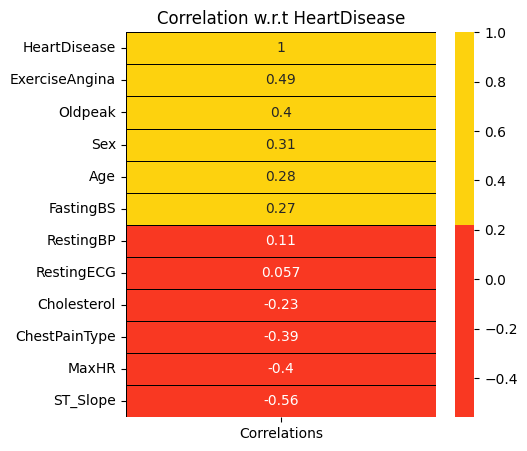

In [17]:
colors = ['#F93822','#FDD20E']
corr = data_cpy.corrwith(data_cpy['HeartDisease']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlations']
plt.subplots(figsize = (5,5))
sns.heatmap(corr,annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black')
plt.title('Correlation w.r.t HeartDisease')

<Axes: >

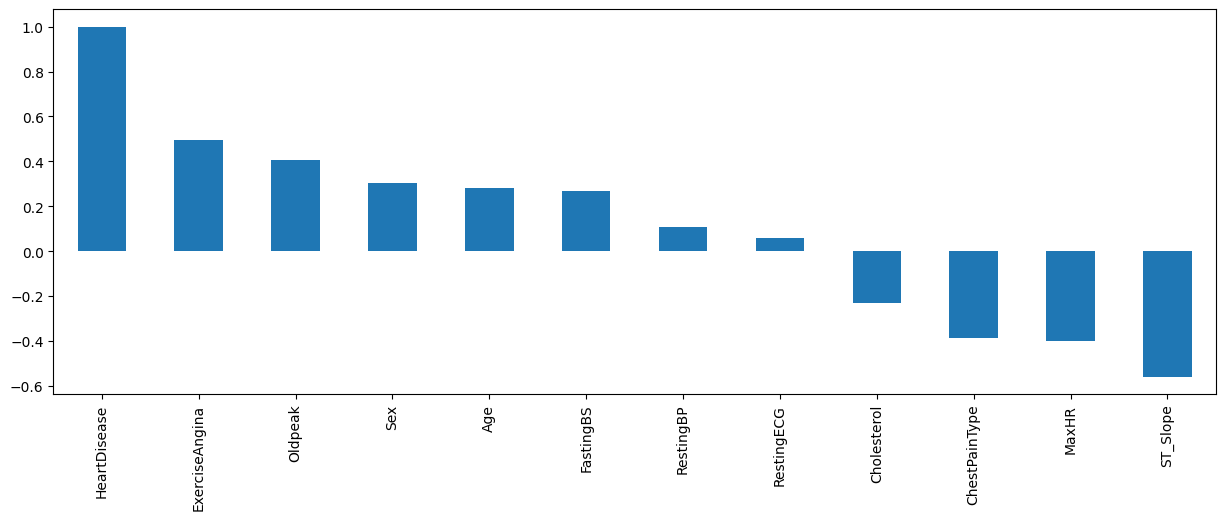

In [19]:
plt.figure(figsize=(15,5))
data_cpy.corr()['HeartDisease'].sort_values(ascending = False).plot(kind='bar')

In [20]:
data_cpy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    float64
 1   Sex             918 non-null    int32  
 2   ChestPainType   918 non-null    int32  
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    int32  
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    int32  
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    int32  
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int32(5), int64(2)
memory usage: 68.3 KB


In [24]:
from sklearn.model_selection import train_test_split
X= data_cpy.iloc[:,:11]
y= data_cpy["HeartDisease"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

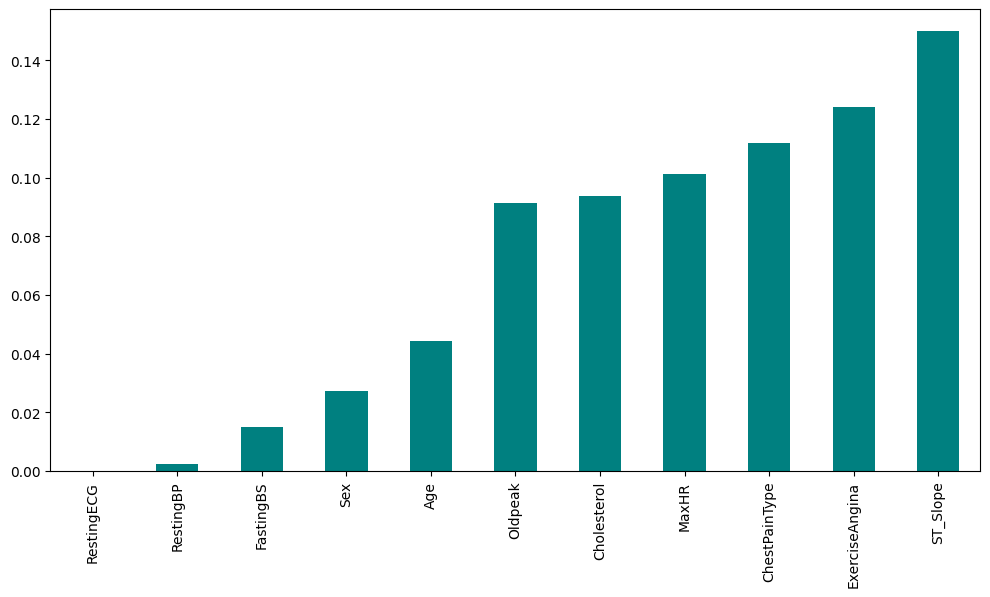

In [25]:
from sklearn.feature_selection import mutual_info_regression


# Assuming X_train is your feature matrix and y_train is your target variable
infor_gain = mutual_info_regression(X_train, y_train)
feature_importance = pd.Series(infor_gain, index=X_train.columns)
feature_importance.sort_values().plot.bar(figsize=(12, 6), color='teal')
plt.show()

As per above information gain and correlation graph it is clearly seen that RestECG and RestingBP is not contributing to the target variable for prediction. So, I decided to drop this feature to reduce the dimentionality and improve the performance of model.

## Modeling

In [14]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [34]:
def model(classifier):
    
    classifier.fit(X_train,y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits = 10,n_repeats = 3,random_state = 1)
    print("Accuracy : ",'{0:.2%}'.format(accuracy_score(y_test,prediction)))
    print("Cross Validation Score : ",'{0:.2%}'.format(cross_val_score(classifier,X_train,y_train,cv = cv,scoring = 'roc_auc').mean()))
    print("ROC_AUC Score : ",'{0:.2%}'.format(roc_auc_score(y_test,prediction)))
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, prediction)  # Update this line
    plt.plot(fpr, tpr)
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def model_evaluation(classifier):
    
    # Confusion Matrix
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    names = ['True Neg','False Pos','False Neg','True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value) for value in cm.flatten()/np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(names,counts,percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cm,annot = labels,cmap = colors,fmt ='')
    
    # Classification Report
    print(classification_report(y_test,classifier.predict(X_test)))

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
classifier_rf = RandomForestClassifier(max_depth = 4,random_state = 0)

Accuracy :  88.04%
Cross Validation Score :  92.95%
ROC_AUC Score :  86.86%


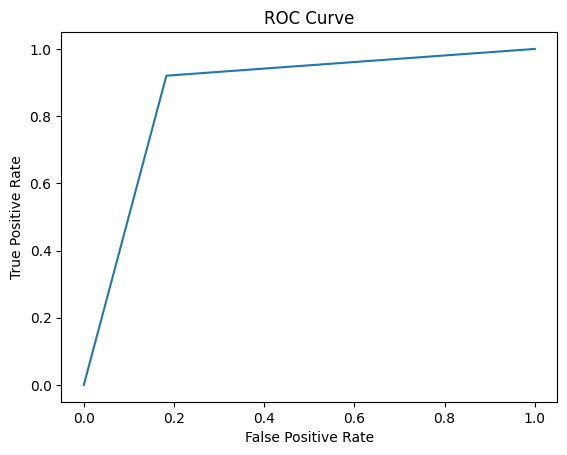

In [37]:
model(classifier_rf)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        71
           1       0.89      0.92      0.90       113

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



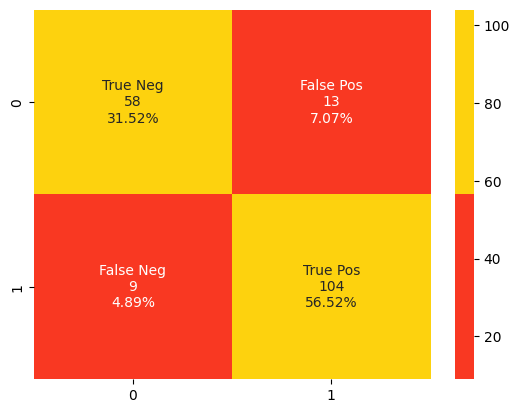

In [38]:
model_evaluation(classifier_rf)